In [29]:
# pip install pandas matplotlib scikit-learn xgboost tabpfn plotly

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from tabpfn import TabPFNClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [30]:
import os

while 'Homeworks' in os.getcwd():
    os.chdir('..')

path = "SpeedDating.csv"
# first column is the index
df = pd.read_csv(path, index_col=0)
df

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like,TARGET
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,0.14,7.0,0
1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,10.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,0.54,7.0,0
3,30.0,5.0,15.0,40.0,5.0,5.0,7.0,9.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,0.61,7.0,1
4,30.0,10.0,20.0,10.0,10.0,20.0,8.0,9.0,6.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.21,6.0,1
5,50.0,0.0,30.0,10.0,0.0,10.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.25,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,15.0,15.0,20.0,25.0,10.0,15.0,2.0,6.0,2.0,1.0,25.0,10.0,20.0,20.0,10.0,15.0,0.35,5.0,0
1837,15.0,15.0,25.0,25.0,15.0,5.0,4.0,8.0,3.0,2.0,25.0,10.0,20.0,20.0,10.0,15.0,0.45,5.0,0
1838,20.0,20.0,20.0,20.0,10.0,10.0,5.0,4.0,5.0,3.0,25.0,10.0,20.0,20.0,10.0,15.0,0.13,5.0,0
1840,15.0,15.0,25.0,25.0,20.0,0.0,4.0,7.0,3.0,0.0,25.0,10.0,20.0,20.0,10.0,15.0,0.54,5.0,0


In [37]:
# train test split
train, test = train_test_split(df, test_size=0.8)
X_train, y_train = train.drop(columns=['TARGET']), train['TARGET']
X_test, y_test = test.drop(columns=['TARGET']), test['TARGET']
len(X_train), len(X_test)

(209, 839)

In [38]:
# Train and evaluate logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression()
clf_logistic_regression.fit(X_train, y_train)

y_pred_logistic_regression = clf_logistic_regression.predict_proba(X_test)[:, 1]

/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Train and evaluate XGBoost
clf_xgboost = xgb.XGBClassifier()
clf_xgboost.fit(X_train, y_train)

y_pred_xgboost = clf_xgboost.predict_proba(X_test)[:, 1]

/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

In [40]:
# Train and evaluate TabPFN
clf_tabpfn = TabPFNClassifier()
clf_tabpfn.fit(X_train, y_train)

y_pred_tabpfn = clf_tabpfn.predict_proba(X_test)[:, 1]

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Text(0.6, 0.1, 'TabPFN AUC: 0.832')

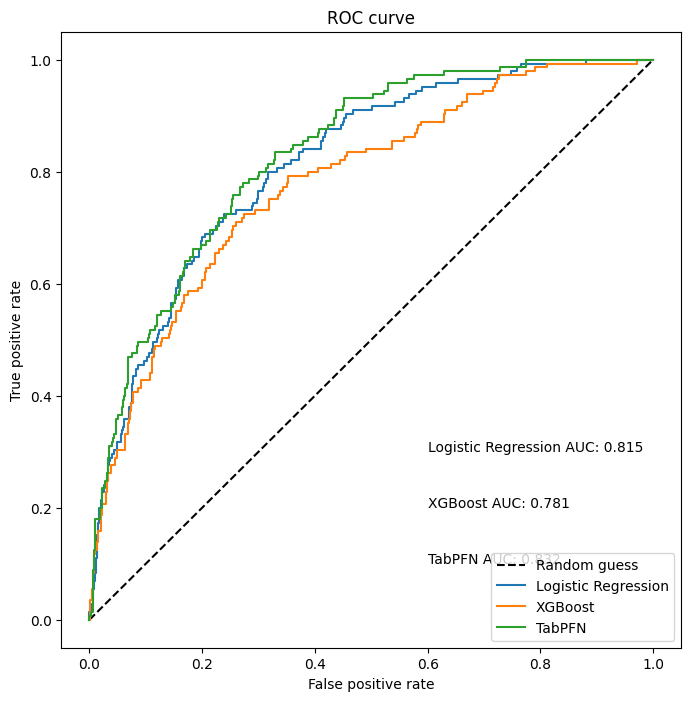

In [46]:
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.plot(*roc_curve(y_test, y_pred_logistic_regression)[:2], label='Logistic Regression')
plt.plot(*roc_curve(y_test, y_pred_xgboost)[:2], label='XGBoost')
plt.plot(*roc_curve(y_test, y_pred_tabpfn)[:2], label='TabPFN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
# legend should be always in right bottom corner

plt.text(0.6, 0.3, f'Logistic Regression AUC: {roc_auc_score(y_test, y_pred_logistic_regression):.3f}')
plt.text(0.6, 0.2, f'XGBoost AUC: {roc_auc_score(y_test, y_pred_xgboost):.3f}')
plt.text(0.6, 0.1, f'TabPFN AUC: {roc_auc_score(y_test, y_pred_tabpfn):.3f}')

/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


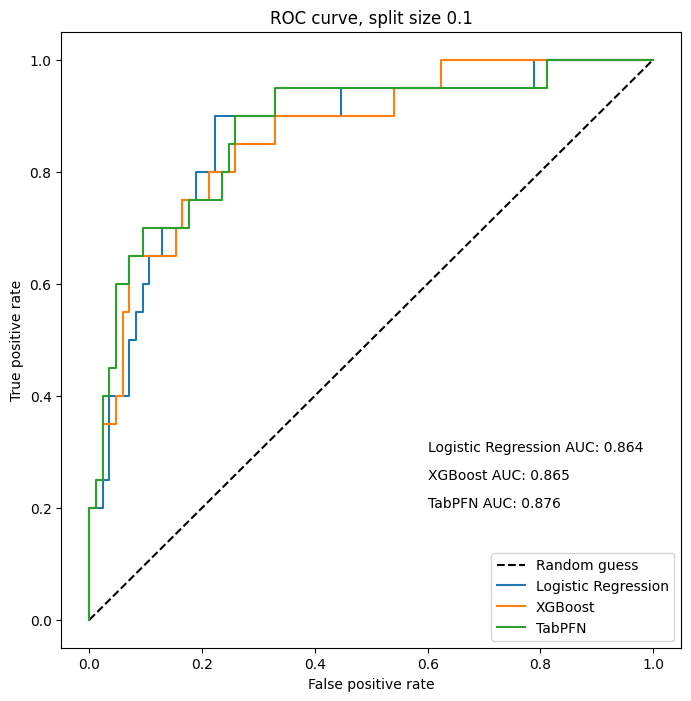

/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


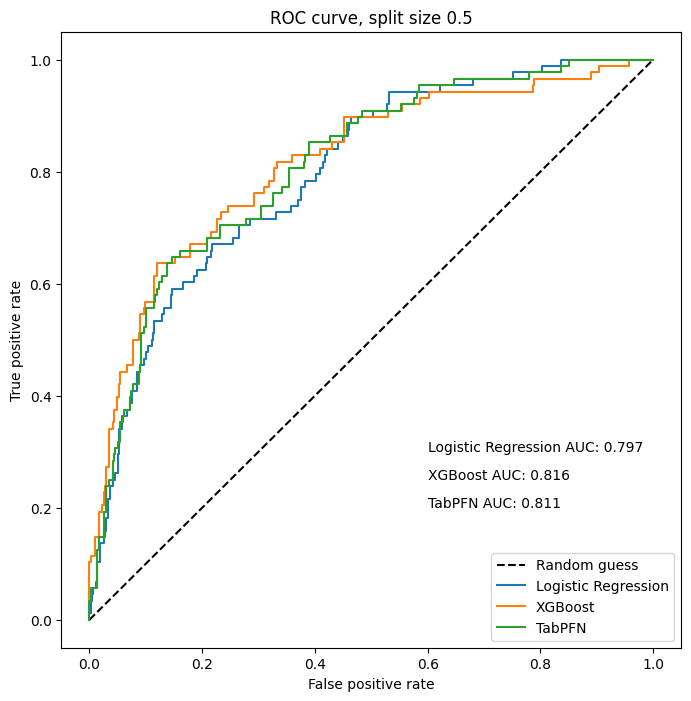

/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jan-praca/miniconda3/envs/XAI/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


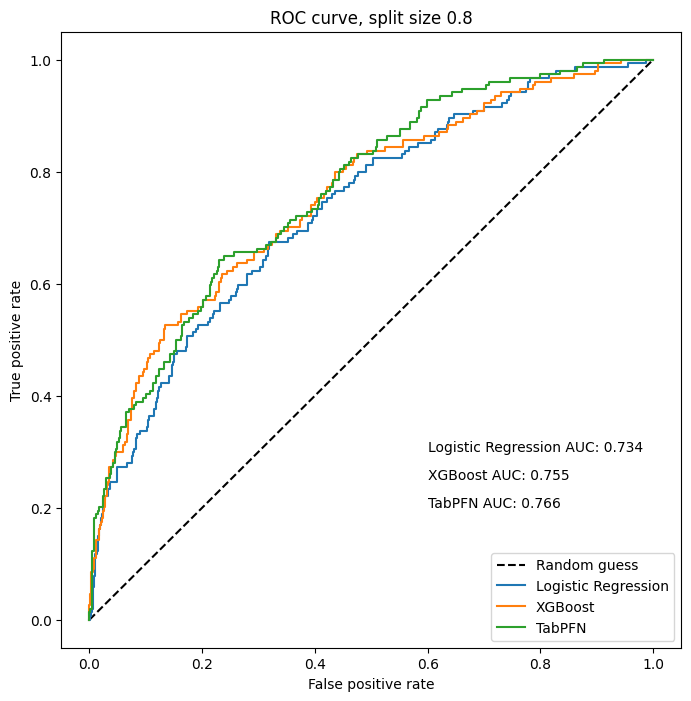

In [50]:
# try different split size
split_sizes = [0.1, 0.5, 0.8]
for split_size in split_sizes:
    train, test = train_test_split(df, test_size=split_size)
    X_train, y_train = train.drop(columns=['TARGET']), train['TARGET']
    X_test, y_test = test.drop(columns=['TARGET']), test['TARGET']
    
    # train all models
    clf_logistic_regression = LogisticRegression()
    clf_logistic_regression.fit(X_train, y_train)
    y_pred_logistic_regression = clf_logistic_regression.predict_proba(X_test)[:, 1]
    
    clf_xgboost = xgb.XGBClassifier()
    clf_xgboost.fit(X_train, y_train)
    y_pred_xgboost = clf_xgboost.predict_proba(X_test)[:, 1]
    
    clf_tabpfn = TabPFNClassifier()
    clf_tabpfn.fit(X_train, y_train)
    y_pred_tabpfn = clf_tabpfn.predict_proba(X_test)[:, 1]
    
    # plot ROC curves
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.plot(*roc_curve(y_test, y_pred_logistic_regression)[:2], label='Logistic Regression')
    plt.plot(*roc_curve(y_test, y_pred_xgboost)[:2], label='XGBoost')
    plt.plot(*roc_curve(y_test, y_pred_tabpfn)[:2], label='TabPFN')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC curve, split size {split_size}')
    plt.text(0.6, 0.3, f'Logistic Regression AUC: {roc_auc_score(y_test, y_pred_logistic_regression):.3f}')
    plt.text(0.6, 0.25, f'XGBoost AUC: {roc_auc_score(y_test, y_pred_xgboost):.3f}')
    plt.text(0.6, 0.2, f'TabPFN AUC: {roc_auc_score(y_test, y_pred_tabpfn):.3f}')
    plt.legend(loc='lower right')
    plt.savefig(f'split_size-{split_size}.png')
    plt.show()
    # save figure
    